# Get data

![link text](https://taimeme.com/public/upload/memes/cuc-tien-500k-la-mieng-dan-ha-sot.jpg)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from distutils.dir_util import copy_tree
import os, pathlib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Help fuctions:


In [ ]:
#@title Help fuctions:
def show_image_in_folder(class_folder, quantity_image_show_per_class = 5,\
quantity_class_show = 5, columns = 5, figsize=(20,10), show_all_class=False): 
    ''' 
    Show random image in classification folder 
    + class_folder: the directory of folder contains classification folders inside 
    + show_all_class: if `True` model will show all class in folder. 
                      if `False` model will show randomly 'quantity_class_show' in folder. 
    ''' 
    import glob, os 
    import matplotlib.pyplot as plt 
    import matplotlib.image as mpimg 
    import random 
    %matplotlib inline 

    images = [] 
    total_class_names = os.listdir(class_folder) 
    total_class_names = [name for name in total_class_names if '.' not in name]

    if show_all_class == True:
        class_names_show =  total_class_names
    elif show_all_class == False:
        class_names_show = random.choices(total_class_names, k=quantity_class_show)


    for class_name in class_names_show: 
    # set class dir and filter jpg files 
        class_dir = os.path.join(class_folder, class_name) 
        class_dir = class_dir + '/*.jpg'  
        for img_path in glob.glob(class_dir): 
            images.append(mpimg.imread(img_path)) 
        
        random.shuffle(images)

        plt.figure(figsize=figsize) 
        columns = columns 
        max_image = quantity_image_show_per_class 
        c = 0 
        for i, image in enumerate(images): 
            plt.subplot(2, columns, i + 1) 
            plt.imshow(image) 
            plt.title(class_name) 
            plt.axis('off') 
            c += 1 
            if c == max_image: 
                images = [] 
                break 

# Count elements inside folder
def get_class_element_count(data_dir): 
    import os 
    class_dict = {} 
    class_list = os.listdir(data_dir) 
    # check number of element inside each class folder: 
    for i in range(len(class_list)): 
        try:
            class_dir = os.path.join(data_dir, class_list[i]) 
            class_count = len(os.listdir(class_dir))
            class_dict[class_list[i]] = class_count
        except Exception:
            pass
    return class_dict

# Plot history after train model:
def visualize_history(history, fig_size=(18, 8)): 
    acc = history.history['accuracy'] 
    val_acc = history.history['val_accuracy'] 
    loss = history.history['loss'] 
    val_loss = history.history['val_loss'] 
    epochs_range = history.epoch

    plt.figure(figsize=fig_size) 
    plt.subplot(1, 2, 1) 
    plt.plot(epochs_range, acc, label='Training Accuracy') 
    plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
    plt.legend(loc='lower right') 
    plt.title('Training and Validation Accuracy') 

    plt.subplot(1, 2, 2) 
    plt.plot(epochs_range, loss, label='Training Loss') 
    plt.plot(epochs_range, val_loss, label='Validation Loss') 
    plt.legend(loc='upper right') 
    plt.title('Training and Validation Loss') 
plt.show() 

In [ ]:
!unzip -q '/content/drive/MyDrive/Colab Notebooks/FTMLE | 2021.07 | ML30/Week_8/DATASET/VND_Banknotes_dataset.zip' -d ./data

1000/Giấy_bạc_1000_đồng.jpg:  mismatching "local" filename (1000/Giс║еy_bс║бc_1000_─Сс╗Уng.jpg),
         continuing with "central" filename version
1000/Đồng_bạc_1000_đồng (1).jpeg:  mismatching "local" filename (1000/─Рс╗Уng_bс║бc_1000_─Сс╗Уng (1).jpeg),
         continuing with "central" filename version
1000/Đồng_bạc_1000_đồng.jpeg:  mismatching "local" filename (1000/─Рс╗Уng_bс║бc_1000_─Сс╗Уng.jpeg),
         continuing with "central" filename version
20000/Đồng_bạc_20.000.jpg:  mismatching "local" filename (20000/─Рс╗Уng_bс║бc_20.000.jpg),
         continuing with "central" filename version


In [ ]:
import os
import pandas as pd

data_dir = '/content/data'
money_list = os.listdir(data_dir)
money_count_dict = {}

for money in money_list:
    money_path = os.path.join(data_dir, money)
    total_image = len(os.listdir(money_path))

    money_count_dict[money] = total_image

pd.DataFrame.from_dict(money_count_dict, orient='index')


0
200000  242
1000     90
20000   218
100000   66
5000    276
10000   170
500000  219
2000    211
50000   221

In [ ]:
# get total class name
total_class_names = money_list
total_class_names

['200000',
 '1000',
 '20000',
 '100000',
 '5000',
 '10000',
 '500000',
 '2000',
 '50000']

In [ ]:
show_image_in_folder(data_dir, 
                     columns=5,
                     quantity_image_show_per_class = 5,
                     quantity_class_show=5,
                     show_all_class = True,
                     figsize=(20,10))

Output hidden; open in https://colab.research.google.com to view.

Comment:
+ Dataset not balance
+ those classes: 100000 VND, 1000 VND and 10000 VND are less so we need to provide more data for them


## Make Dataset:

In [ ]:
# Initial value
IMG_SIZE = (224,224)
BATCH_SIZE = 32
SEED = 96
combine_data_dir = '/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency/combine_data'


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=SEED,
    image_size = (400,400),
    batch_size = 1)


Found 1692 files belonging to 9 classes.


## Create more data and balancing it

In [ ]:
img_augmentation = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
            tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
            # tf.keras.layers.experimental.preprocessing.Normalization(), # add noise
            ])

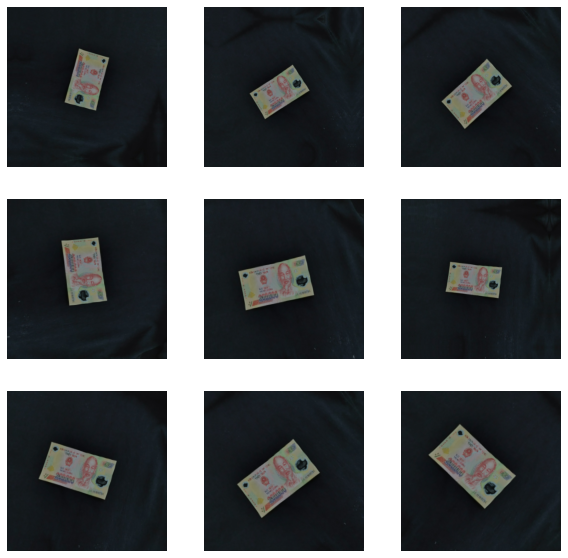

In [ ]:
for image, _ in dataset.take(1): 
	plt.figure(figsize=(10, 10)) 
	first_image = image[0] 
	for i in range(9): 
		ax = plt.subplot(3, 3, i + 1) 
		augmented_image = img_augmentation(tf.expand_dims(first_image, 0)) 
		plt.imshow(augmented_image[0] / 255) 
		plt.axis('off') 

In [ ]:
dataset.class_names

['1000',
 '10000',
 '100000',
 '2000',
 '20000',
 '200000',
 '5000',
 '50000',
 '500000']

In [ ]:
#----------------------------------
# MAKE NEW AUGMENTATION IMAGES
#----------------------------------
import os

new_aug_dir = './new_augmentaion_data_v3''
os.mkdir(new_aug_dir)

# make class_folders:
for class_name in total_class_names:
    path = os.path.join(aug_data_dir, class_name)
    os.mkdir(path)

# Augmentation work well now! let's make more data :))
# get image from dataset --> Augmentation data --> New images 
# --> save in New classification folder
# --> Update on new dataset

from keras.preprocessing.image import save_img
import os
i = 1
for img, label in dataset:
    augmented_img = img_augmentation(img)
    class_name = dataset.class_names[label.numpy()[0]]

    new_dir = new_aug_dir + class_name

    new_label = 'aug_'+ class_name + str(i) + '.jpg'
    new_file = new_dir + f'/{new_label}'

    save_img(new_file, augmented_img[0])
    i+=1


In [ ]:
from distutils.dir_util import copy_tree

source_dir = '/content/new_augmentaion_data_v3'
destination_dir = '/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency/'

copy_tree(source_dir, destination_dir)

In [ ]:
# store ori-data in ggdrive:
source_dir = '/content/data'
destination_dir = '/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency/'

copy_tree(source_dir, destination_dir)

In [ ]:
# augmentation for 10.000,100.000,1000
#----------------------------------
# MAKE NEW AUGMENTATION IMAGES
#----------------------------------
import os

new_aug_dir = './new_augmentaion_data_v5'
os.mkdir(new_aug_dir)
cl_names_tc = [1000,10000,100000]

# make class_folders for 10000,100000,1000:
for class_name in total_class_names:
    if int(class_name) in cl_names_tc:
        path = os.path.join(new_aug_dir, class_name)
        os.mkdir(path)

In [ ]:
# Augmentation work well now! let's make more data :))
# get image from dataset --> Augmentation data --> New images 
# --> save in New classification folder
# --> Update on new dataset

from keras.preprocessing.image import save_img
import os
i = 1
for y in range(3): # make 3 times of dataset
    for img, label in dataset:
        augmented_img = img_augmentation(img)
        class_name = dataset.class_names[label.numpy()[0]]

        if int(class_name) in cl_names_tc:
            new_dir = new_aug_dir +'/'+ class_name

            new_label = 'aug_'+str(y)+ class_name + str(i) + '.jpg'
            new_file = new_dir + f'/{new_label}'

            save_img(new_file, augmented_img[0])
            i+=1


In [ ]:
list_dir = os.listdir('/content/new_augmentaion_data_v5')
list_dir

['10000', '100000', '1000']

In [ ]:
# store ori-data in ggdrive:
list_dir = os.listdir('/content/new_augmentaion_data_v5')
for dir in list_dir:
    source_dir = '/content/new_augmentaion_data_v5' + '/'+ dir
    destination_dir = '/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency/aug_data' + '/' + dir

    copy_tree(source_dir, destination_dir)

## Combine data file

In [ ]:
total_class_names

['200000',
 '1000',
 '20000',
 '100000',
 '5000',
 '10000',
 '500000',
 '2000',
 '50000']

In [ ]:
# Make new combined_data folder:
combine_data_dir = '/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency/combine_data'
os.mkdir(combine_data_dir)

for cl in total_class_names:
    cl_dir = os.path.join(combine_data_dir, cl)
    os.mkdir(cl_dir)

In [ ]:
# Combine data:
ori_data_dir = '/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency/origin_dataset'
aug_data_dir = '/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency/aug_data'
combine_data_dir = '/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency/combine_data'

for class_name in total_class_names:
    # Copy from original data to combine folder
    source_dir_ori = os.path.join(ori_data_dir, class_name)
    destination_dir = os.path.join(combine_data_dir, class_name)

    copy_tree(source_dir_ori, destination_dir, verbose=2)

    # Copy from augmentation data to combine folder
    source_dir_aug = os.path.join(aug_data_dir, class_name)
    destination_dir = os.path.join(combine_data_dir, class_name)

    copy_tree(source_dir_aug, destination_dir, verbose=2)

In [ ]:
get_class_element_count(ori_data_dir)

{'1000': 90,
 '10000': 170,
 '100000': 66,
 '2000': 211,
 '20000': 218,
 '200000': 242,
 '5000': 276,
 '50000': 221,
 '500000': 219}

In [ ]:
# Count again data:
get_class_element_count(combine_data_dir)

{'1000': 628,
 '10000': 548,
 '100000': 517,
 '2000': 420,
 '20000': 434,
 '200000': 481,
 '5000': 551,
 '50000': 442,
 '500000': 437}

=> Yah! our data looked good and balance now :))

## Make new dataset <==

In [ ]:
# Initial value
IMG_SIZE = (224,224)
BATCH_SIZE = 32
SEED = 96
combine_data_dir = '/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency/combine_data'


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    combine_data_dir,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    combine_data_dir,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle = True)

Found 4437 files belonging to 9 classes.
Using 3550 files for training.
Found 4437 files belonging to 9 classes.
Using 887 files for validation.


In [ ]:
# backup dataset
train_ds_bk = train_ds
val_ds_bk = val_ds


## Configure dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE 

train_ds = train_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE) 
val_ds = val_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE) 


# Build model

## MobileNetV2

### First run:

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SIZE+(3,),
                                               include_top = False,
                                               weights='imagenet')

# Freeze params:
base_model.trainable=False

base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
# Build classification part:
input = layers.Input(shape=IMG_SIZE+(3,))
x = tf.keras.applications.mobilenet_v2.preprocess_input(input)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation = 'relu')(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(9, activation='softmax')(x)
model = tf.keras.Model(inputs=input, outputs=output)

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.math.truediv_5 (TFOpLambd (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract_5 (TFOpLamb (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1280)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               3279

In [ ]:
# Compile:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

# callback:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience = 5,
                                                  verbose = 1)

check_point = tf.keras.callbacks.ModelCheckpoint('./mobilenetv2_v1.h5', 
                                                 verbose=2, 
                                                 save_best_only=True)

# Fit model:
EPOCHS = 30
history = model.fit(train_ds, epochs=EPOCHS,
                    validation_data=val_ds,
                    callbacks=[early_stopping, check_point])


Epoch 1/30
111/111 [==============================] - 59s 148ms/step - loss: 0.7295 - accuracy: 0.7763 - val_loss: 0.2564 - val_accuracy: 0.9256

Epoch 00001: val_loss improved from inf to 0.25641, saving model to ./mobilenetv2_v1.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/30
111/111 [==============================] - 56s 143ms/step - loss: 0.2832 - accuracy: 0.9107 - val_loss: 0.1698 - val_accuracy: 0.9493

Epoch 00002: val_loss improved from 0.25641 to 0.16980, saving model to ./mobilenetv2_v1.h5
Epoch 3/30
111/111 [==============================] - 55s 137ms/step - loss: 0.1846 - accuracy: 0.9411 - val_loss: 0.1293 - val_accuracy: 0.9628

Epoch 00003: val_loss improved from 0.16980 to 0.12932, saving model to ./mobilenetv2_v1.h5
Epoch 4/30
111/111 [==============================] - 55s 139ms/step - loss: 0.1496 - accuracy: 0.9496 - val_loss: 0.1223 - val_accuracy: 0.9549

Epoch 00004: val_loss improved from 0.12932 to 0.12231, saving model to ./mobilenetv2_v1.h5
Epoch 5/30
111/111 [==============================] - 55s 139ms/step - loss: 0.1095 - accuracy: 0.9656 - val_loss: 0.1453 - val_accuracy: 0.9459

Epoch 00005: val_loss did not improve from 0.12231
Epoch 6/30
111/111 [==============================] - 55s 139ms/step - loss: 0.0960 - acc

=> Yep!!!! Very nice result with above 97.52% accuracy in validation set

In [ ]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

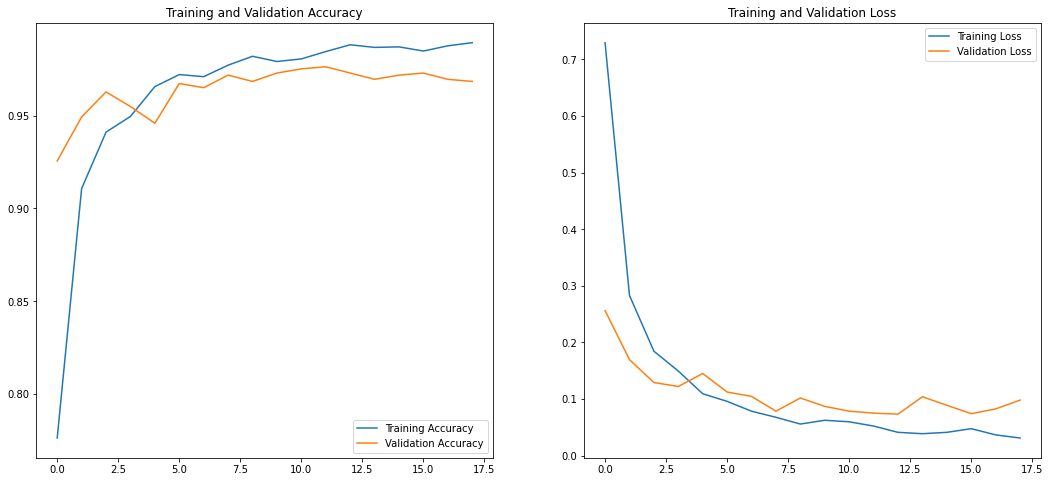

In [ ]:
visualize_history(history)

### Finetuning

In [ ]:
# total number of layers in base_model:
len(base_model.layers)

154

In [ ]:
# Unfreeze base_model:
base_model.trainable = True

# Fine-tuning:
fine_tuning_at = 150

for layer in base_model.layers[:fine_tuning_at]:
    layer.trainable = False

# Compile:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.math.truediv_5 (TFOpLambd (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract_5 (TFOpLamb (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1280)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               3279

In [ ]:
# callback:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience = 5,
                                                  verbose = 2)

check_point = tf.keras.callbacks.ModelCheckpoint('./mobilenetv2_v2.h5', 
                                                 verbose=2, 
                                                 save_best_only=True)

# Fit model
init_epochs = 17
fine_tune_epochs = 20
total_epochs = init_epochs + fine_tune_epochs

history_fine = model.fit(train_ds, 
                         validation_data=val_ds,
                         epochs=total_epochs,
                         initial_epoch=init_epochs,
                         callbacks=[early_stopping, check_point])


Epoch 18/37
111/111 [==============================] - 60s 151ms/step - loss: 0.2156 - accuracy: 0.9454 - val_loss: 0.1526 - val_accuracy: 0.9538

Epoch 00018: val_loss improved from inf to 0.15264, saving model to ./mobilenetv2_v2.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 19/37
111/111 [==============================] - 56s 144ms/step - loss: 0.0973 - accuracy: 0.9724 - val_loss: 0.1159 - val_accuracy: 0.9673

Epoch 00019: val_loss improved from 0.15264 to 0.11593, saving model to ./mobilenetv2_v2.h5
Epoch 20/37
111/111 [==============================] - 56s 141ms/step - loss: 0.0750 - accuracy: 0.9772 - val_loss: 0.1018 - val_accuracy: 0.9729

Epoch 00020: val_loss improved from 0.11593 to 0.10182, saving model to ./mobilenetv2_v2.h5
Epoch 21/37
111/111 [==============================] - 56s 142ms/step - loss: 0.0449 - accuracy: 0.9879 - val_loss: 0.0741 - val_accuracy: 0.9820

Epoch 00021: val_loss improved from 0.10182 to 0.07409, saving model to ./mobilenetv2_v2.h5
Epoch 22/37
111/111 [==============================] - 56s 142ms/step - loss: 0.0325 - accuracy: 0.9918 - val_loss: 0.0918 - val_accuracy: 0.9786

Epoch 00022: val_loss did not improve from 0.07409
Epoch 23/37
111/111 [==============================] - 56s 142ms/step - loss: 0.0191 

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

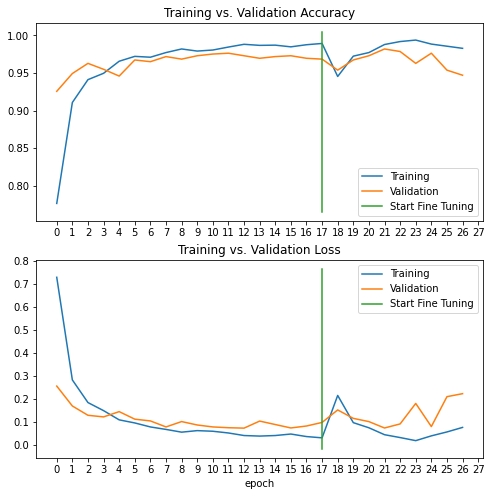

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.xticks(range(total_epochs))
# plt.ylim([0.9, 1])
plt.plot([init_epochs,init_epochs],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training vs. Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.xticks(range(total_epochs))
# plt.ylim([0, 0.5])
plt.plot([init_epochs,init_epochs],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training vs. Validation Loss')
plt.xlabel('epoch')
plt.show()

=> After fine-tuning the accuracy of our model has increase to `98.2%` at epoch 21st (has improved from 97.2% at first-run).

Now we can load saved checkpoint to take more evaluate the model 

In [ ]:
# Copy saved model to ggdrive:
import shutil
file_path = '/content/mobilenetv2_v2.h5'
destinaton_folder_path = '/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency'

shutil.copy(file_path, destinaton_folder_path)

'/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency/mobilenetv2_v1.h5'

# Load model

In [ ]:
# LOAD MODEL
final_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency/mobilenetv2_v2.h5')

# Compile again
final_model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

# Evaluate model again:
final_model.evaluate(val_ds_bk)

28/28 [==============================] - 192s 4s/step - loss: 0.0741 - accuracy: 0.9820


[0.07409213483333588, 0.9819616675376892]

In [ ]:
final_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.math.truediv_5 (TFOpLambd (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract_5 (TFOpLamb (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1280)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               3279

# Error Evaluate

In [ ]:
class_names = val_ds_bk.class_names
class_names

['1000',
 '10000',
 '100000',
 '2000',
 '20000',
 '200000',
 '5000',
 '50000',
 '500000']

In [ ]:
# get all image paths:
img_paths = val_ds_bk.file_paths
img_paths[:5]

['/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency/combine_data/1000/aug_1000546.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency/combine_data/1000/aug_1000769.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency/combine_data/500000/aug_500000454.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency/combine_data/100000/aug_100000952.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Projects/deep_learning_VN_currency/combine_data/200000/IMG_20190828_115050.jpg']

In [ ]:
# get all file names, file name must be in form of 'with_mask/with-mask-default-mask-seed1001.png'
filenames = [img_path.split('/')[-2:] for img_path in img_paths]
filenames = [f'{f[0]}/{f[1]}'for f in filenames]
filenames[:5]


['1000/aug_1000546.jpg',
 '1000/aug_1000769.jpg',
 '500000/aug_500000454.jpg',
 '100000/aug_100000952.jpg',
 '200000/IMG_20190828_115050.jpg']

### Confution matrix:

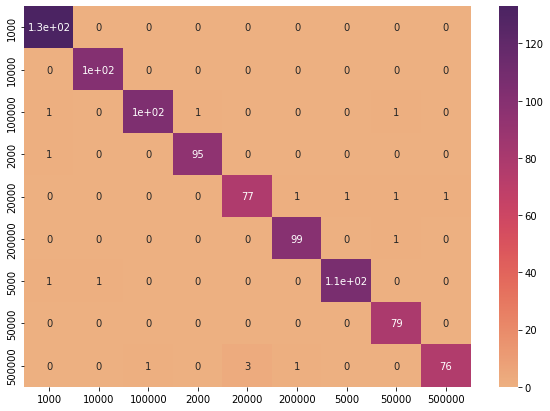

In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in val_ds_bk:
  predictions = np.concatenate([predictions, np.argmax(final_model.predict(x), axis = -1)])
  labels = np.concatenate([labels, y.numpy()])

# calculate confution matrix
confusion_matrix = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

# plot confusion matrix:
import seaborn as sns

df_cm = pd.DataFrame(confusion_matrix, index = class_names,
                  columns = class_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap='flare')

### Classification report:

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels, predictions, target_names=class_names))

              precision    recall  f1-score   support

        1000       0.98      1.00      0.99       133
       10000       0.99      1.00      1.00       101
      100000       0.99      0.97      0.98       107
        2000       0.99      0.99      0.99        96
       20000       0.96      0.95      0.96        81
      200000       0.98      0.99      0.99       100
        5000       0.99      0.98      0.99       109
       50000       0.96      1.00      0.98        79
      500000       0.99      0.94      0.96        81

    accuracy                           0.98       887
   macro avg       0.98      0.98      0.98       887
weighted avg       0.98      0.98      0.98       887



Model be confused a bit between 20.000 VND And 500.000 VND.

Sometimes, Even Vietnames people also make this mistake :))

![20.000](https://art-hanoi.com/collection/vnpaper/vn-p120ae-f.jpg)

![500000](https://art-hanoi.com/collection/vnpaper/vn-p124m-f.jpg)

### Plot Error Images

In [ ]:
#@title Plot Image help functions

def get_images_with_sorted_probabilities(prediction_table,
                                         get_highest_probability,
                                         label,
                                         number_of_items,
                                         only_false_predictions=False):
    '''
    + `prediction_table`: is prediction_table fuction
    + `get_highest_probability`: Boolean value.
        - If `True` : will get those images with highest probability
        - If `False`: will get those images with lowest probability
    + `label`: the number corresponding to class's lable that we want to show
    + `number_of_items`: quantity of images that we want to show
    + `only_false_predictions`: Show wrong prediction images

    '''
    sorted_prediction_table = [(k, prediction_table[k])
                               for k in sorted(prediction_table,
                                               key=prediction_table.get,
                                               reverse=get_highest_probability)
                               ]
    result = []
    for index, key in enumerate(sorted_prediction_table):
        image_index, [probability, predicted_index, gt] = key
        if predicted_index == label:
            if only_false_predictions == True:
                if predicted_index != gt:
                    result.append(
                        [image_index, [probability, predicted_index, gt]])
            else:
                result.append(
                    [image_index, [probability, predicted_index, gt]])
    return result[:number_of_items]

def plot_images(filenames, distances, message):
    import matplotlib.image as mpimg
    
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(20, 15))
    columns = 5
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title("\n\n" + filenames[i].split("/")[-1] + "\n" +
                     "\nProbability: " +
                     str(float("{0:.2f}".format(distances[i]))))
        plt.suptitle(message, fontsize=20, fontweight='bold')
        plt.axis('off')
        plt.imshow(image)
        
def display(sorted_indices, message):
    val_dir = combine_data_dir
    similar_image_paths = []
    distances = []
    for name, value in sorted_indices:
        [probability, predicted_index, gt] = value
        similar_image_paths.append(str(val_dir) + '/' + filenames[name])
        distances.append(probability)
    plot_images(similar_image_paths, distances, message)

def prediction_table(predictions, ground_truth):
    '''
    input
    + `prediction`: prediction on validation dataset
    + `ground_truth`: an array of truth value of validation dataset
        - if validation in type of generator: `ground_truth = val_generator.classes`
        - if validation in type of dataset: ...?...

    ''' 
    prediction_table = {}
    for index, val in enumerate(predictions):
        # get argmax index
        index_of_highest_probability = np.argmax(val)
        value_of_highest_probability = val[index_of_highest_probability]
        prediction_table[index] = [value_of_highest_probability, 
                                index_of_highest_probability, 
                                ground_truth[index]]
    assert len(predictions) == len(ground_truth) == len(prediction_table)
    return prediction_table

Re-make validation dataset:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
   
val_gen = ImageDataGenerator(validation_split=0.2)  # IMPORTANT

val_gen = val_gen.flow_from_directory(
        combine_data_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False,        # IMPORTANT
        seed=SEED,              # IMPORTANT
        subset='validation')  # IMPORTANT


Found 884 images belonging to 9 classes.


In [ ]:
# initial variable assignment:
predictions = final_model.predict(val_gen)
pred_indices = np.argmax(predictions,axis=1)

ground_truth = val_gen.classes

filenames = val_gen.filenames
# img_paths = list(map(lambda x: str(val_dir/x), filenames))  # Full path
img_paths = val_gen.filepaths

# prediction table:
# prediction_table = prediction_table(predictions, ground_truth)

In [ ]:
# prediction_table is a dict with index, prediction, ground truth
prediction_table = prediction_table(predictions, ground_truth)

In [ ]:
df2 = pd.DataFrame(prediction_table)
df2 = df2.T
df2.head()

0    1    2
0  0.999999  0.0  0.0
1  0.999576  0.0  0.0
2  0.998002  0.0  0.0
3  0.999975  0.0  0.0
4  1.000000  0.0  0.0

In [ ]:
# check id of class:
val_gen.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '2000': 3,
 '20000': 4,
 '200000': 5,
 '5000': 6,
 '50000': 7,
 '500000': 8}

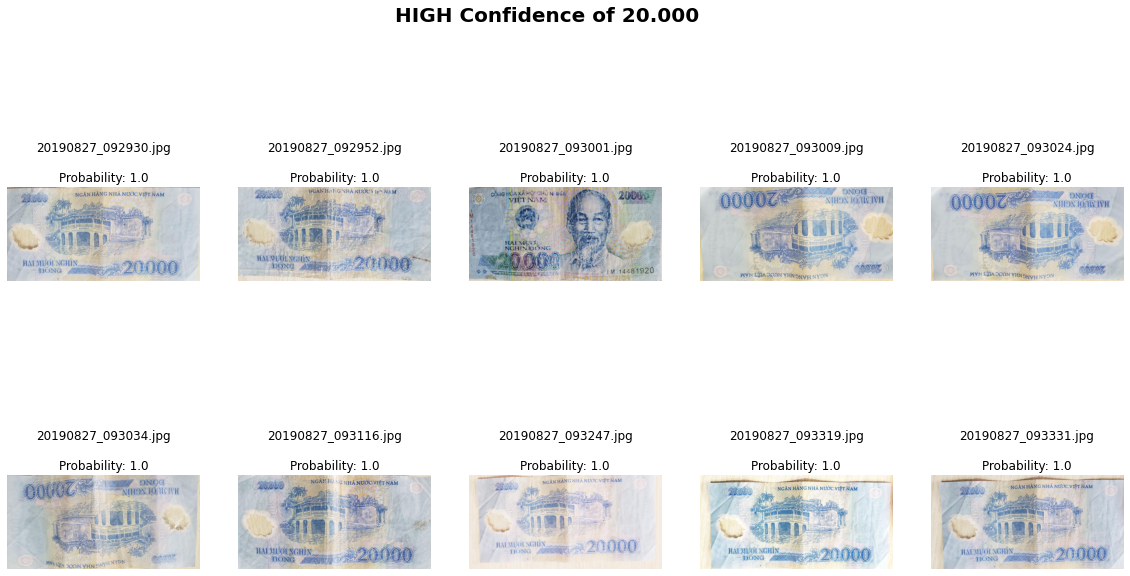

In [ ]:
message = 'HIGH Confidence of 20.000'
highest_confident_wear_marsk = get_images_with_sorted_probabilities(prediction_table, True, 4, 10, False)
display(highest_confident_wear_marsk, message)

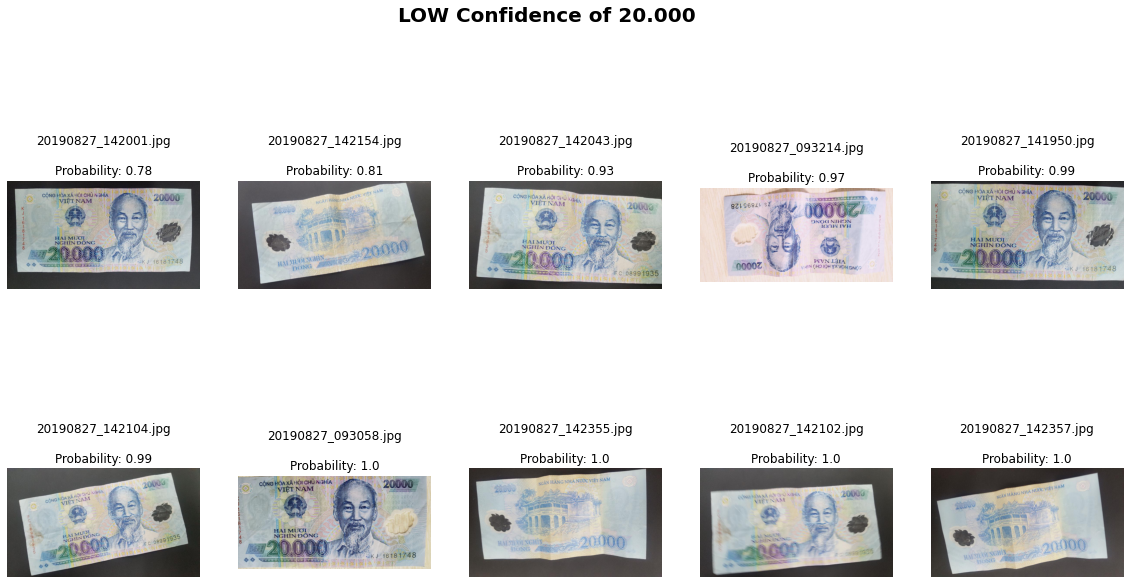

In [ ]:
message = 'LOW Confidence of 20.000'
highest_confident_wear_marsk = get_images_with_sorted_probabilities(prediction_table, False, 4, 10, False)
display(highest_confident_wear_marsk, message)

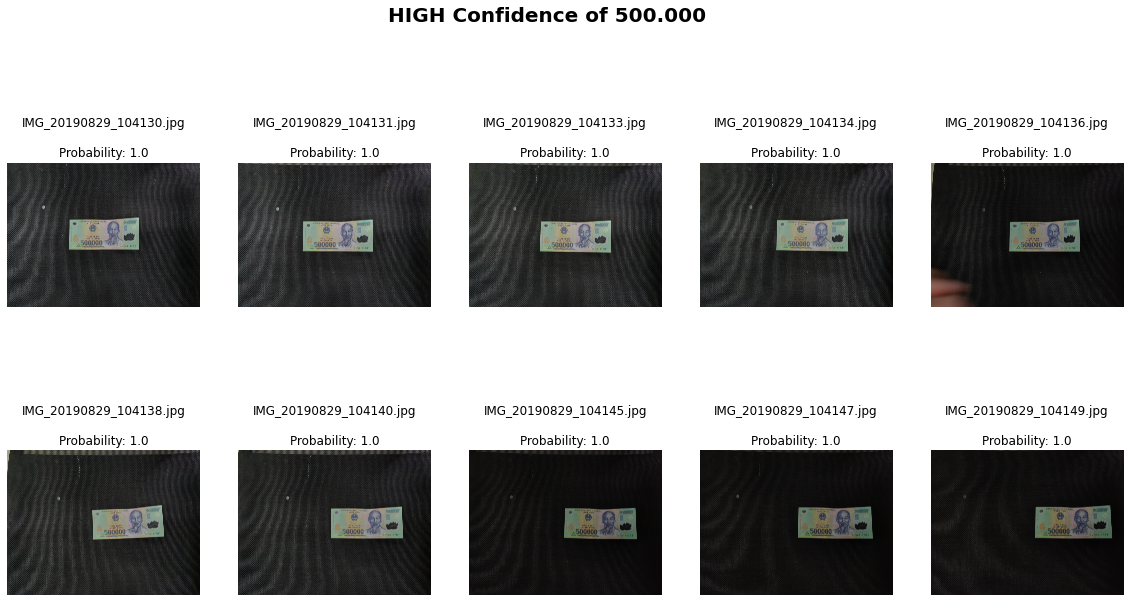

In [ ]:
message = 'HIGH Confidence of 500.000'
highest_confident_wear_marsk = get_images_with_sorted_probabilities(prediction_table, True, 8, 10, False)
display(highest_confident_wear_marsk, message)

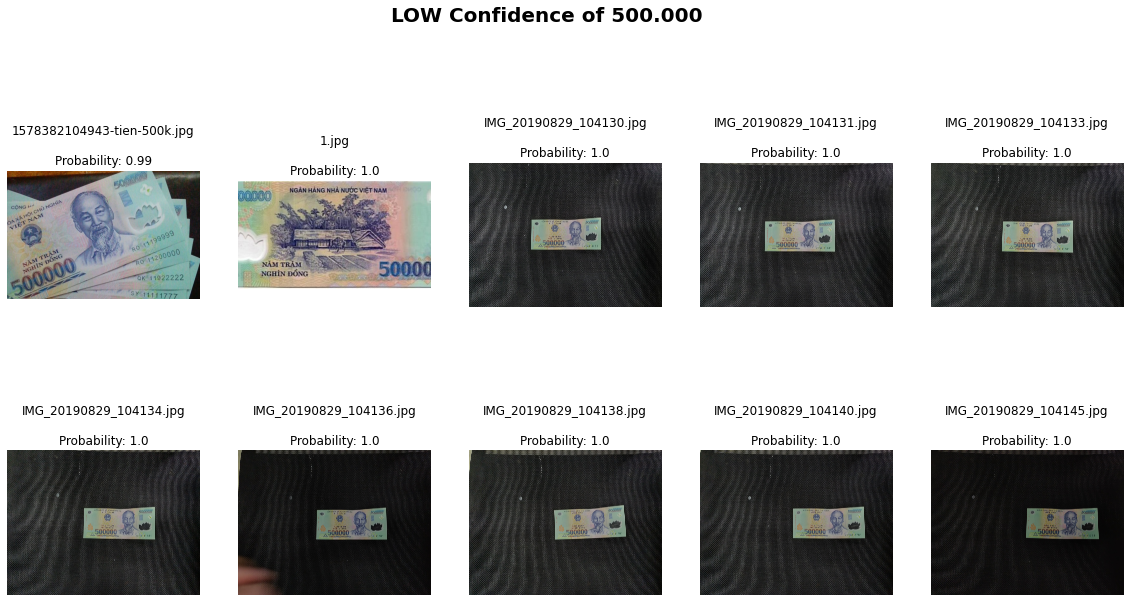

In [ ]:
message = 'LOW Confidence of 500.000'
highest_confident_wear_marsk = get_images_with_sorted_probabilities(prediction_table, False, 8, 10, False)
display(highest_confident_wear_marsk, message)

## Predict real image

### Correct predictions

Saving PXL_20210918_073607404.MP.jpg to PXL_20210918_073607404.MP (1).jpg
PXL_20210918_073607404.MP.jpg


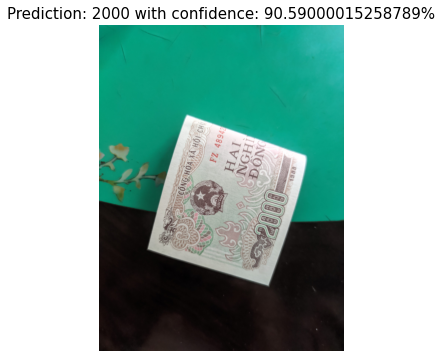

True

In [ ]:
''' def predict(model, image_path, img_size, data_set):
    from tensorflow.keras.preprocessing import image
    import matplotlib.image as mpimg
    
    img = image.load_img(image_path, target_size=(img_size[0], img_size[1]))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    prediction = model.predict(img)

    pred = data_set.class_names[prediction.argmax()]
    confidence = round(np.max(prediction),4)*100

    plt.figure(figsize=(9, 6))
    img = mpimg.imread(image_path)
    imgplot = plt.imshow(img)
    plt.title('Prediction: ' + pred.upper() + ' with confidence: ' + str(confidence) + '%', fontsize=15)
    plt.grid(b=None)
    plt.axis('off')
    plt.show()

    return True

# UPLOAD A PHOTO and PREDICT
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    print(fn)
    img_path = './' + fn

predict(final_model, img_path, IMG_SIZE, val_ds_bk)
 '''

Saving 20k.jpeg to 20k.jpeg
20k.jpeg


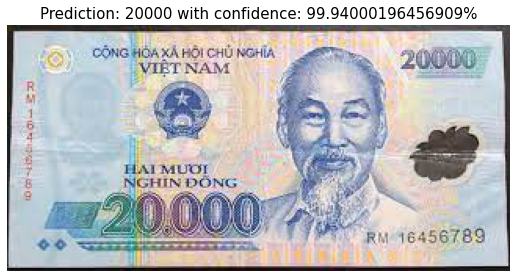

True

In [ ]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    print(fn)
    img_path = './' + fn

predict(final_model, img_path, IMG_SIZE, val_ds_bk)


Saving 500k2.jpg to 500k2.jpg
500k2.jpg


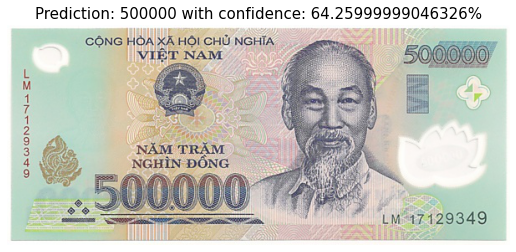

True

In [ ]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    print(fn)
    img_path = './' + fn

predict(final_model, img_path, IMG_SIZE, val_ds_bk)

=> Because in dataset don't have image like this

Saving PXL_20210918_073733402.MP.jpg to PXL_20210918_073733402.MP.jpg
PXL_20210918_073733402.MP.jpg


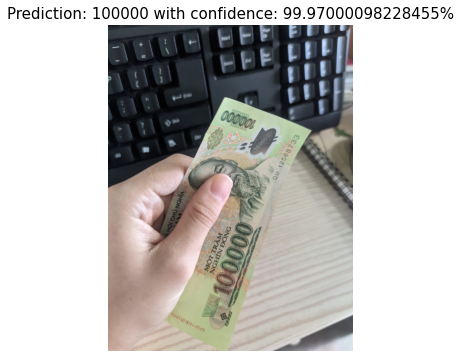

True

In [ ]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    print(fn)
    img_path = './' + fn

predict(final_model, img_path, IMG_SIZE, val_ds_bk)

Saving PXL_20210918_073739589.jpg to PXL_20210918_073739589.jpg
PXL_20210918_073739589.jpg


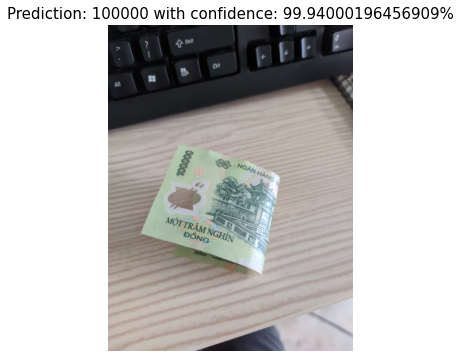

True

In [ ]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    print(fn)
    img_path = './' + fn

predict(final_model, img_path, IMG_SIZE, val_ds_bk)

Saving 50k.jpg to 50k.jpg
50k.jpg


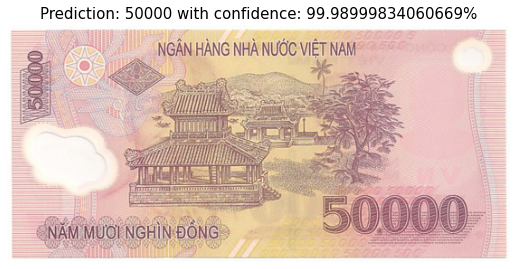

True

In [ ]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    print(fn)
    img_path = './' + fn

predict(final_model, img_path, IMG_SIZE, val_ds_bk)

### Wrong predictions

Saving PXL_20210918_073756840.MP.jpg to PXL_20210918_073756840.MP.jpg
PXL_20210918_073756840.MP.jpg


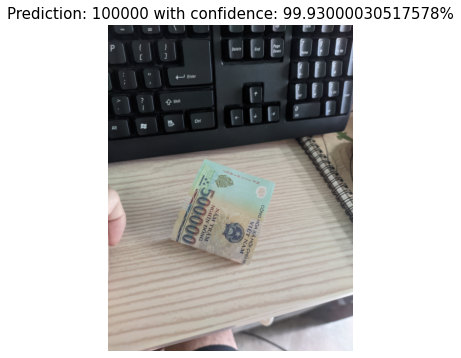

True

In [ ]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    print(fn)
    img_path = './' + fn

predict(final_model, img_path, IMG_SIZE, val_ds_bk)

Saving PXL_20210918_073754843.jpg to PXL_20210918_073754843.jpg
PXL_20210918_073754843.jpg


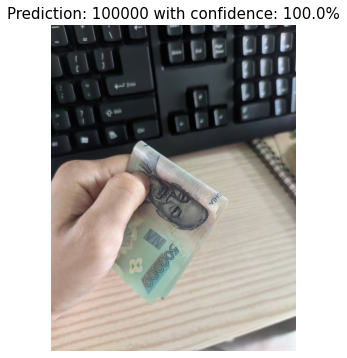

True

In [ ]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    print(fn)
    img_path = './' + fn

predict(final_model, img_path, IMG_SIZE, val_ds_bk)

Saving 500k3.jpg to 500k3.jpg
500k3.jpg


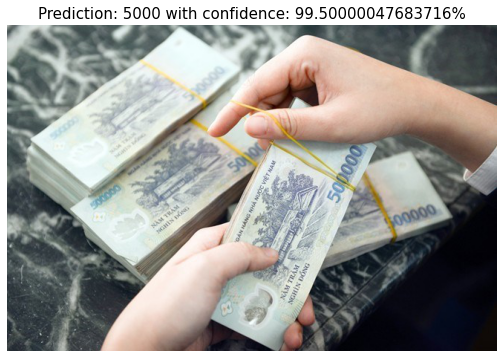

True

In [ ]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    print(fn)
    img_path = './' + fn

predict(final_model, img_path, IMG_SIZE, val_ds_bk)

## GramCAD

In [ ]:
#@title Gram CAD help fuctions

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from pathlib import Path

# plotting functions
def get_img_array(img_path, img_size):
    # `img` is a PIL image
    img = keras.preprocessing.image.load_img(img_path, target_size=(img_size,img_size)) # load and resize
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    # array = preprocess_input(array)     # comment this line if model includes a preprocessing layer
    return array

def plot_image_with_pred(img_path, model, labels, img_size=224):
    # display part
    img = Image.open(img_path)
    img =  img.resize((img_size,img_size))   # resize to mimic model's input
    img = np.array(img)
    plt.imshow(img)
    # prediction part
    img_array = get_img_array(img_path, img_size)
    preds = model.predict(img_array)
    plt.title(f'Prediction: {labels[preds.argmax(axis=1)[0]]}, with {round(preds.max()*100,2)}%')
    return img_array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names, base_model_idx, pretrained=True):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    if pretrained:
        last_conv_layer = model.layers[base_model_idx].get_layer(last_conv_layer_name)
        last_conv_layer_model = keras.Model(model.layers[base_model_idx].inputs, last_conv_layer.output)
    else:
        last_conv_layer = model.get_layer(last_conv_layer_name)
        last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

        
    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    
    for layer_name in classifier_layer_names:
      try:
          x = model.get_layer(layer_name)(x)
      except Exception:
          x = model.layers[base_model_idx].get_layer(layer_name)(x)  
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index] # the f function

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

# We load the original image
def plot_with_heatmap(img_path, heatmap, img_size=224):
    img = keras.preprocessing.image.load_img(img_path, target_size=(img_size, img_size))
    img = keras.preprocessing.image.img_to_array(img)

    # We rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # We use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # We use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # We create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap  + img*0.6
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    
    fig, axes = plt.subplots(2, 1, figsize=(10,10))
    step = img_size//7
    axes[0].set_xticks([x*step for x in range(1,7)])
    axes[0].set_yticks([x*step for x in range(1,7)])
    axes[0].imshow(jet_heatmap.astype(int))
    axes[1].set_xticks([x*step for x in range(1,7)])
    axes[0].set_yticks([x*step for x in range(1,7)])
    axes[1].imshow(superimposed_img)

def display_everything(path, last_conv_layer_name, the_rest_names, base_model_idx, class_names):
    img_path = Path(path)
    
    #   img_array = plot_image_with_pred(img_path, model,labels=list(train_generator.class_indices.keys()))
    img_array = plot_image_with_pred(img_path, model,labels=class_names)
    
    heatmap = make_gradcam_heatmap(img_array, model, 
                                    last_conv_layer_name, 
                                    the_rest_names,
                                    base_model_idx)
    
    plot_with_heatmap(img_path,heatmap)
    
########
# NOTE #
########
'''
in order to use GRAMCAD you need to:
1. class_names:     is list of all class names
2. base_model_idx:  is base_model index
3. last_conv_idx:   is the last Conv layer index in base_model
4. the_rest_names:  in 'the_rest_names' must not contain any strange layer name
                    if have, you need to delete them out
'''


In [ ]:
class_names = train_ds_bk.class_names
class_names

['1000',
 '10000',
 '100000',
 '2000',
 '20000',
 '200000',
 '5000',
 '50000',
 '500000']

In [ ]:
# Use model.summary() to get index of base_model (start to count with 0)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.math.truediv_5 (TFOpLambd (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract_5 (TFOpLamb (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1280)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               3279

In [ ]:
final_model.layers[3].summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
# example, last conv model index is -3
# IMPORTANT, we have:
base_model_idx = 3
last_conv_idx = -3
model = final_model

last_conv_layer_name = final_model.layers[base_model_idx].layers[last_conv_idx].name # destination layer
the_rest_names = [i.name for i in final_model.layers[base_model_idx].layers[last_conv_idx+1:]] + [j.name for j in final_model.layers[2:]]

# remove unwanted name if need:
the_rest_names = [name for name in the_rest_names if ('tf.math' not in name) and ('mobilenetv2' not in name)]

# CHECK
print(last_conv_layer_name, '\n')
print(the_rest_names)



Conv_1 

['Conv_1_bn', 'out_relu', 'global_average_pooling2d_5', 'dropout_10', 'dense_10', 'dropout_11', 'dense_11']


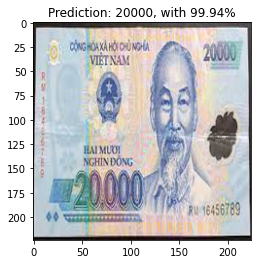

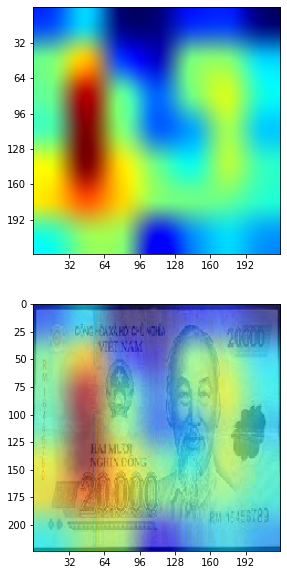

In [ ]:
img_path = '/content/20k.jpeg'
display_everything(img_path, last_conv_layer_name, the_rest_names, base_model_idx, class_names)

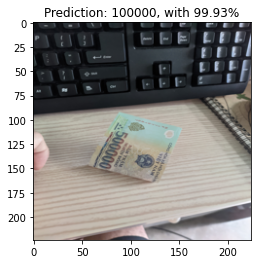

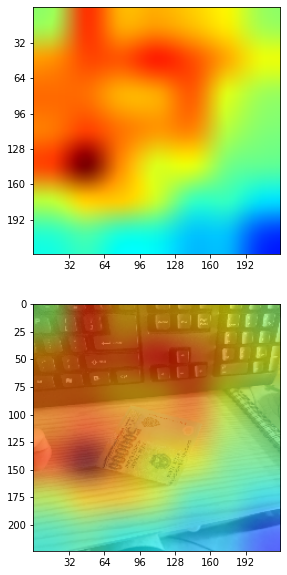

In [ ]:
img_path = '/content/PXL_20210918_073756840.MP.jpg'
display_everything(img_path, last_conv_layer_name, the_rest_names, base_model_idx, class_names)

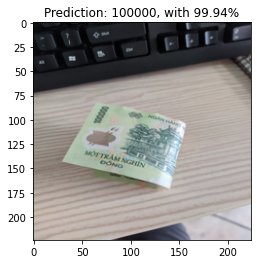

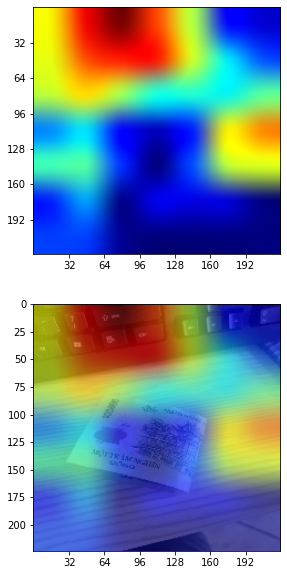

In [ ]:
img_path = '/content/PXL_20210918_073739589.jpg'
display_everything(img_path, last_conv_layer_name, the_rest_names, base_model_idx, class_names)

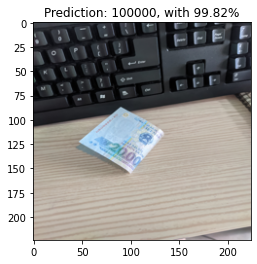

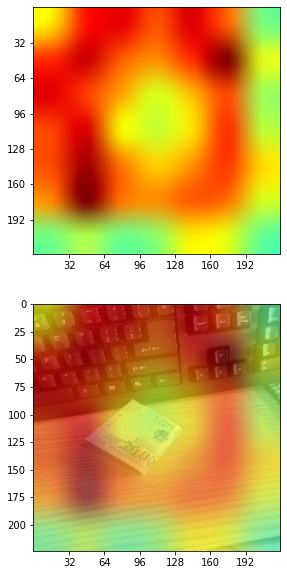

In [ ]:
img_path = '/content/PXL_20210918_073657090.MP.jpg'
display_everything(img_path, last_conv_layer_name, the_rest_names, base_model_idx, class_names)

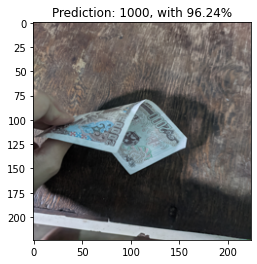

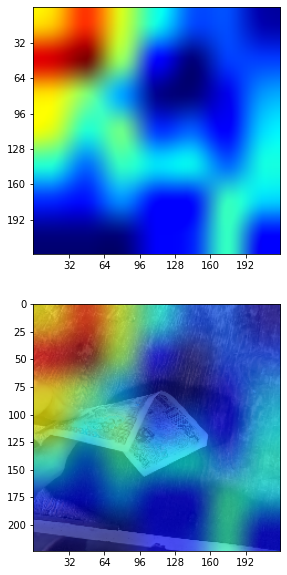

In [ ]:
img_path = '/content/PXL_20210919_125836481.MP.jpg'
display_everything(img_path, last_conv_layer_name, the_rest_names, base_model_idx, class_names)

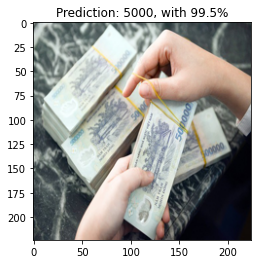

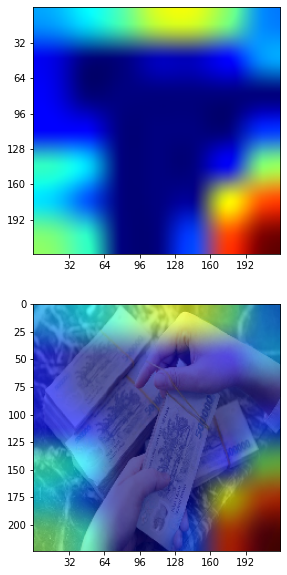

In [ ]:
img_path = '/content/500k3.jpg'
display_everything(img_path, last_conv_layer_name, the_rest_names, base_model_idx, class_names)